<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/DY_HEART22JAN24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction Using Machine Learning**



**1. Data Description**

**2.Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#cross validation
from sklearn.model_selection import StratifiedKFold

#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

from scipy import stats



**2. Loading the Dataset**

In [ ]:
df= pd.read_csv('heart.csv', na_values='?')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
# CHECK DUPLICATION
dup = df.duplicated().any()
dup

False

In [ ]:
df= df.drop_duplicates()

In [ ]:
df.shape

(302, 14)

In [ ]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['sex'].value_counts()  #Male -1 #Female-2

1    206
0     96
Name: sex, dtype: int64

In [ ]:
df['sex'].replace(0,'Female',inplace=True)
df['sex'].replace(1,'Male',inplace=True)


In [ ]:
df['cp'].value_counts() #1 typical angina,2,atypical 3 non anginal 4 assymptomatic

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [ ]:
df['cp'].replace(0,'typical angina',inplace=True)
df['cp'].replace(1,'atypical angina',inplace=True)
df['cp'].replace(3,'non angina pain',inplace=True)
df['cp'].replace(0,'assymptomatic',inplace=True)

In [ ]:
df['restecg'].value_counts() #o normal, 1 abnormal 2,left ventricular hypertrophy

1    151
0    147
2      4
Name: restecg, dtype: int64

In [ ]:
df['restecg'].replace(0,'normal',inplace=True)
df['restecg'].replace(1,'S-T wave abnormal',inplace=True)
df['restecg'].replace(2,'left ventricular hyoertrophy',inplace=True)

In [ ]:
df['slope'].value_counts() #

2    141
1    140
0     21
Name: slope, dtype: int64

In [ ]:
df['slope'].replace(0,'upsloping',inplace=True)
df['slope'].replace(1,'flat',inplace=True)
df['slope'].replace(2,'downsloping',inplace=True)

In [ ]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [ ]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
 df['target'].value_counts() #1 hear risk 0 normal

1    164
0    138
Name: target, dtype: int64

checking gender and agewise distribution

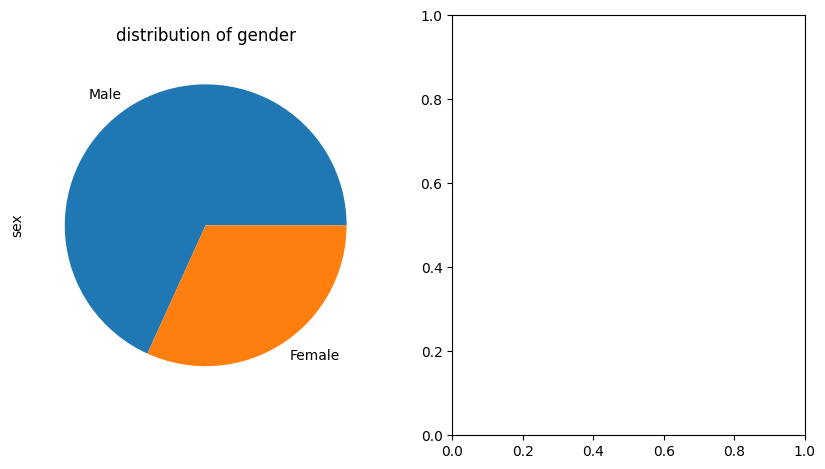

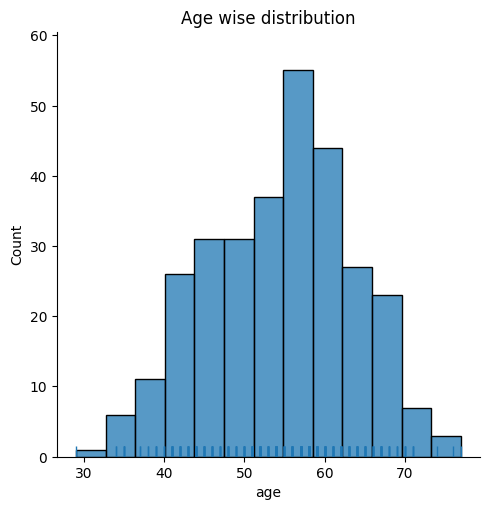

In [ ]:
plt.figure(figsize=(10,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(labels =['Male','Female'])

plt.title('distribution of gender')

plt.subplot(222)
ax =sns.displot(df['age'],rug=True)
plt.title('Age wise distribution')
plt.show()

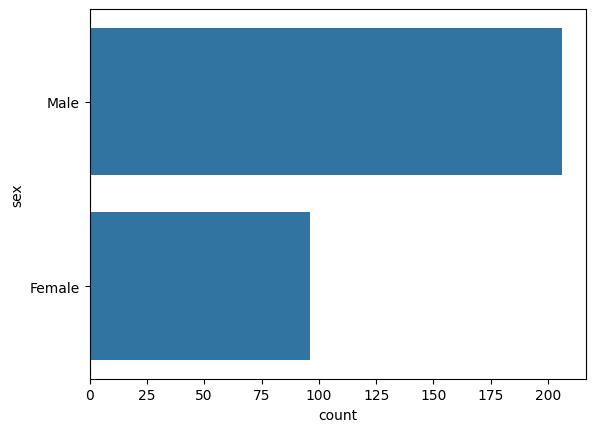

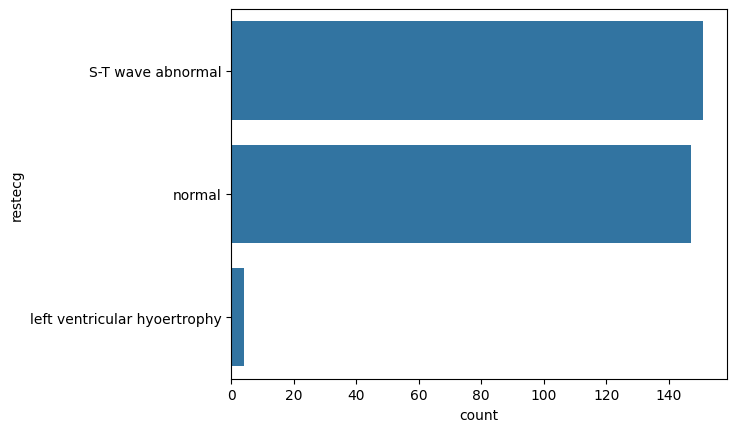

In [ ]:
sns.countplot(df['sex'])
plt.show()
sns.countplot(df['restecg'])
plt.show()